# SMS SPAM DETECTION

In [63]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('spam.csv',encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
454,spam,"Loan for any purpose å£500 - å£75,000. Homeown...",NaN,NaN,NaN
3528,spam,Xmas & New Years Eve tickets are now on sale f...,NaN,NaN,NaN
3033,ham,Get ready for &lt;#&gt; inches of pleasure...,NaN,NaN,NaN
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...,NaN,NaN,NaN
3461,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN


In [65]:
df.shape

(5572, 5)

## Data Cleaning

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [68]:
# rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# change target into binary

In [69]:
from sklearn.preprocessing import LabelEncoder as LE
encoder=LE()

In [70]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
# null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [72]:
#check duplicates
df.duplicated().sum()

403

In [73]:
#drop duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [74]:
df.shape

(5169, 2)

# EDA

In [75]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

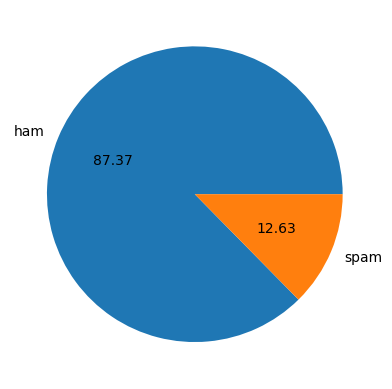

In [76]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [77]:
 #making new columns(no. of chars,words and sentences) for better analyzing
     

In [78]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
 df['num_chars']=df['text'].apply(len)

In [80]:
df.sample(3)

,target,text,num_chars
4468,0,"Nothing, smsing u n xy lor. Sorry lor da guys ...",160
3609,0,"Call me. I m unable to cal. Lets meet bhaskar,...",55
423,1,URGENT! Your Mobile number has been awarded wi...,137


In [81]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [82]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [83]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [84]:
#hams 
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [85]:
#spams
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [86]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

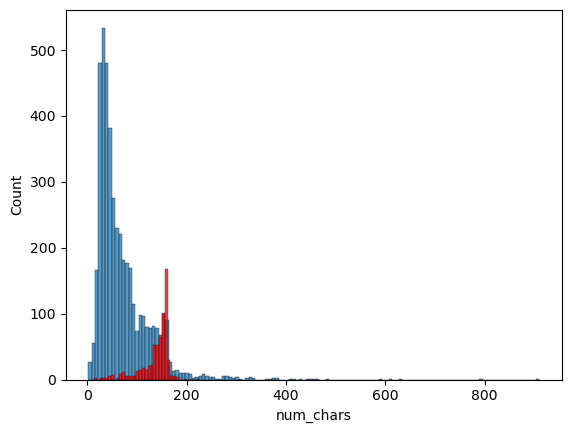

In [87]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

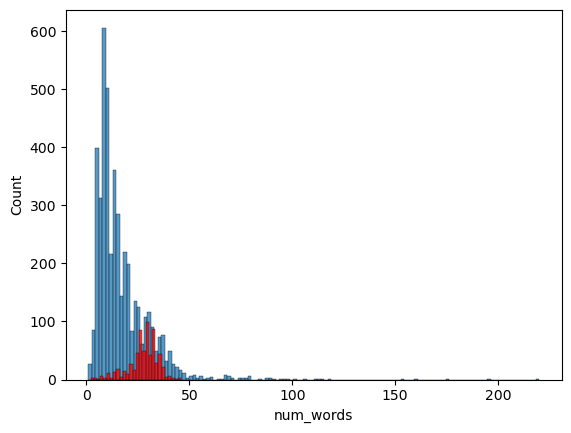

In [88]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

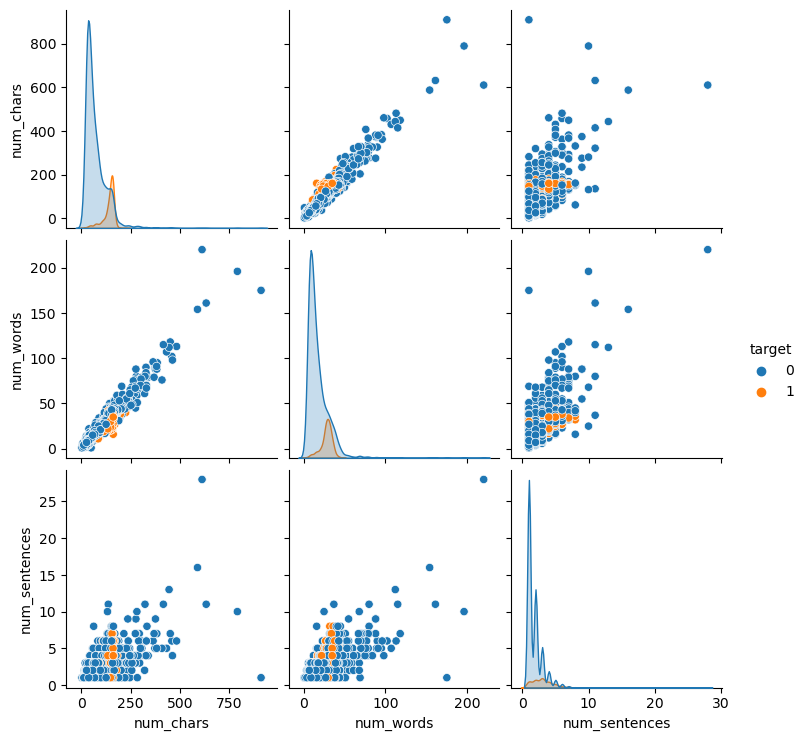

In [89]:
sns.pairplot(df,hue='target')

<Axes: >

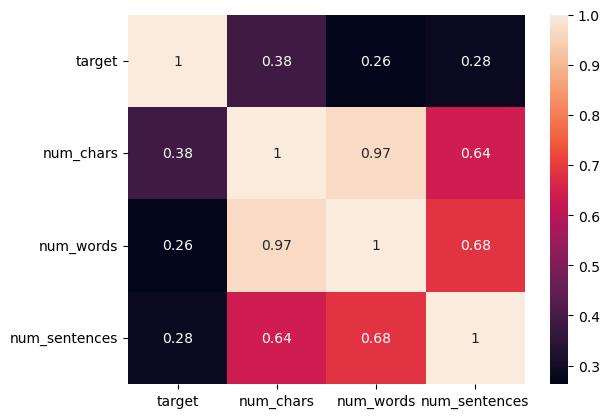

In [90]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [91]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
import string  
puncs=string.punctuation

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravi9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords+list(puncs): 
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [93]:
df['transformed_text']=df['text'].apply(transform_text)
df.sample(5)

,target,text,num_chars,num_words,num_sentences,transformed_text
3310,0,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE?...,158,37,3,hi darlin work u get troubl ijust talk mum mor...
4082,0,"Good afternoon, my love. It was good to see yo...",153,39,4,good afternoon love good see word ym get tm sm...
695,0,Good. Good job. I like entrepreneurs,36,8,3,good good job like entrepreneur
1157,0,He's an adult and would learn from the experie...,140,31,4,adult would learn experi real danger dont like...
1236,0,How much are we getting?,24,6,1,much get


In [94]:
# !pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

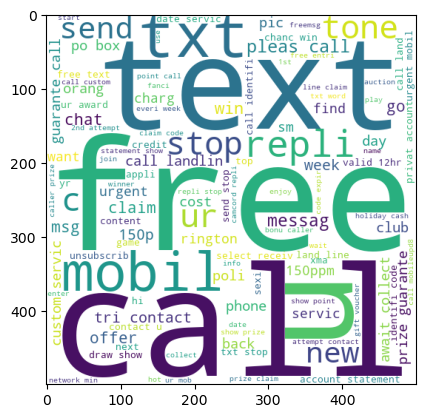

In [95]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
# plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

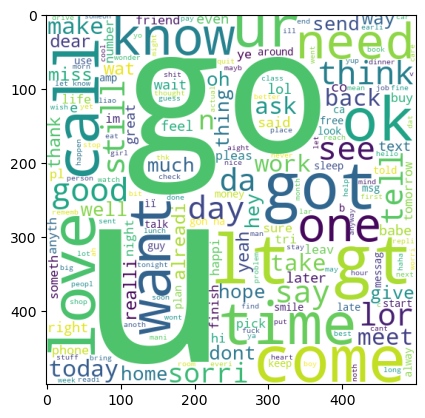

In [96]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
# plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [97]:
spam_words=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [98]:
len(spam_words)

9939

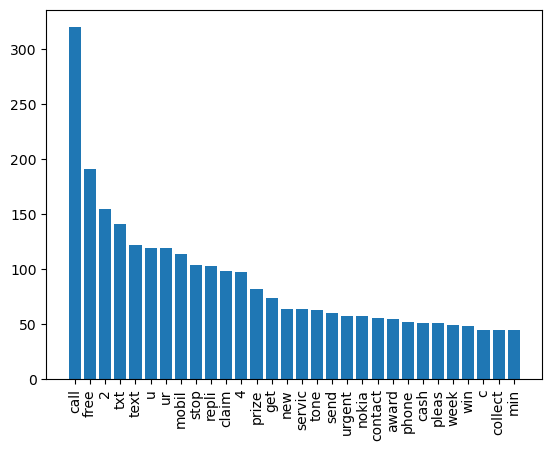

In [99]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [100]:
ham_words=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [101]:
len(ham_words)

35394

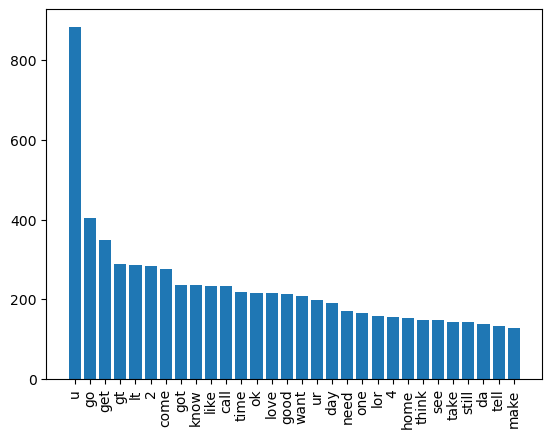

In [102]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING->naive bayes start

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [104]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
X.shape


(5169, 3000)

In [106]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [107]:
from sklearn.model_selection import train_test_split


In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [112]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [113]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [115]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [117]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [118]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [119]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [120]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

In [121]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# performance_df1

In [122]:
# sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [123]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [124]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


NameError: name 'accuracy_scores' is not defined

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
# new_df_scaled.merge(temp_df,on='Algorithm')


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [ ]:
voting.fit(X_train,y_train)


In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))